## Task 3: Customer Segmentation / Clustering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA

### 1. Load the data

In [2]:
# Load datasets
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

# Display the first few rows of each dataframe
print(customers.head())
print(transactions.head())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


### 2. Data Preparation

In [3]:
# Merge transactions with customer data to create customer profiles
customer_profiles = transactions.merge(customers, on='CustomerID')

# Aggregate transaction data to create a profile for each customer
customer_profile_data = customer_profiles.groupby('CustomerID').agg({
    'TotalValue': 'sum',       # Total spending
    'Quantity': 'sum',         # Total quantity purchased
    'Region': 'first',         # Keep region information
    'SignupDate': 'first'      # Keep signup date for potential analysis
}).reset_index()

# Convert categorical variables to numerical (e.g., Region)
customer_profile_data = pd.get_dummies(customer_profile_data, columns=['Region'], drop_first=True)

# Display the aggregated customer profile data
print(customer_profile_data.head())


  CustomerID  TotalValue  Quantity  SignupDate  Region_Europe  \
0      C0001     3354.52        12  2022-07-10              0   
1      C0002     1862.74        10  2022-02-13              0   
2      C0003     2725.38        14  2024-03-07              0   
3      C0004     5354.88        23  2022-10-09              0   
4      C0005     2034.24         7  2022-08-15              0   

   Region_North America  Region_South America  
0                     0                     1  
1                     0                     0  
2                     0                     1  
3                     0                     1  
4                     0                     0  


### 3. Clustering Using K-Means

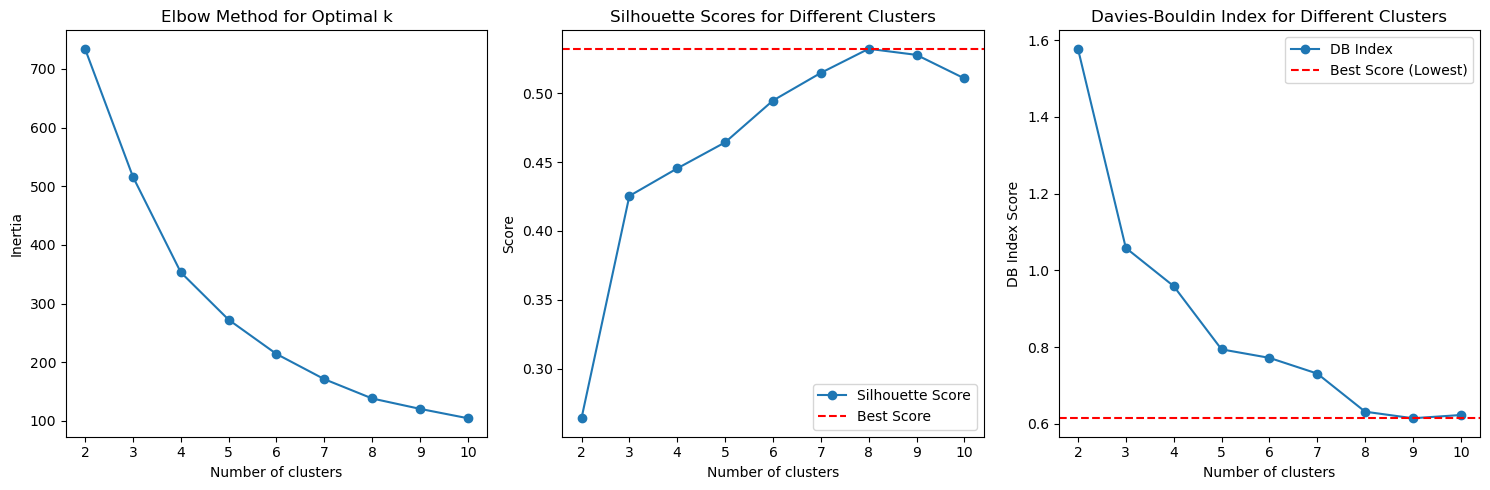

Clusters: 2, Silhouette Score: 0.2639, DB Index: 1.5777
Clusters: 3, Silhouette Score: 0.4255, DB Index: 1.0586
Clusters: 4, Silhouette Score: 0.4455, DB Index: 0.9590
Clusters: 5, Silhouette Score: 0.4644, DB Index: 0.7942
Clusters: 6, Silhouette Score: 0.4948, DB Index: 0.7720
Clusters: 7, Silhouette Score: 0.5149, DB Index: 0.7310
Clusters: 8, Silhouette Score: 0.5324, DB Index: 0.6317
Clusters: 9, Silhouette Score: 0.5280, DB Index: 0.6146
Clusters: 10, Silhouette Score: 0.5109, DB Index: 0.6230


In [4]:
# Standardize the feature columns for clustering
features = customer_profile_data.drop(columns=['CustomerID', 'SignupDate'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
# Convert scaled_features back to a DataFrame for consistency
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns) 


# Initialize lists to store metrics
inertia = []
silhouette_scores = []
db_index_scores = []

# Evaluate clustering metrics for different numbers of clusters (2 to 10)
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(scaled_features_df) 
    
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features_df, kmeans.labels_))
    db_index_scores.append(davies_bouldin_score(scaled_features_df, kmeans.labels_))

# Plotting the metrics for comparison
plt.figure(figsize=(15, 5))

# Inertia plot (Elbow Method)
plt.subplot(1, 3, 1)
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

# Silhouette Scores plot
plt.subplot(1, 3, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', label='Silhouette Score')
plt.title('Silhouette Scores for Different Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.axhline(y=max(silhouette_scores), color='r', linestyle='--', label='Best Score')
plt.legend()

# DB Index plot
plt.subplot(1, 3, 3)
plt.plot(range(2, 11), db_index_scores, marker='o', label='DB Index')
plt.title('Davies-Bouldin Index for Different Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('DB Index Score')
plt.axhline(y=min(db_index_scores), color='r', linestyle='--', label='Best Score (Lowest)')
plt.legend()

plt.tight_layout()
plt.show()

# Print out the metrics for reference
for i in range(2, 11):
    print(f'Clusters: {i}, Silhouette Score: {silhouette_scores[i-2]:.4f}, DB Index: {db_index_scores[i-2]:.4f}')

### 1. Silhouette Score:
* The silhouette score indicates how well-separated the clusters are. Higher values are better, with scores closer to 1 indicating well-defined clusters.
* In our results, the highest silhouette score is 0.5324 for 8 clusters, suggesting that this configuration provides reasonably well-defined clusters.
### 2. Davies-Bouldin Index:
* The DB Index measures the average similarity ratio of each cluster with its most similar cluster. Lower values indicate better clustering.
* In our results, the lowest DB Index is 0.6317 for 8 clusters, indicating that this configuration has the best separation between clusters.

## Final Clustering with Selected Number of Clusters:
Using the K-Means again with 8 clusters to finalize your clustering model.

Final Davies-Bouldin Index for 8 clusters: 0.6316509778687248


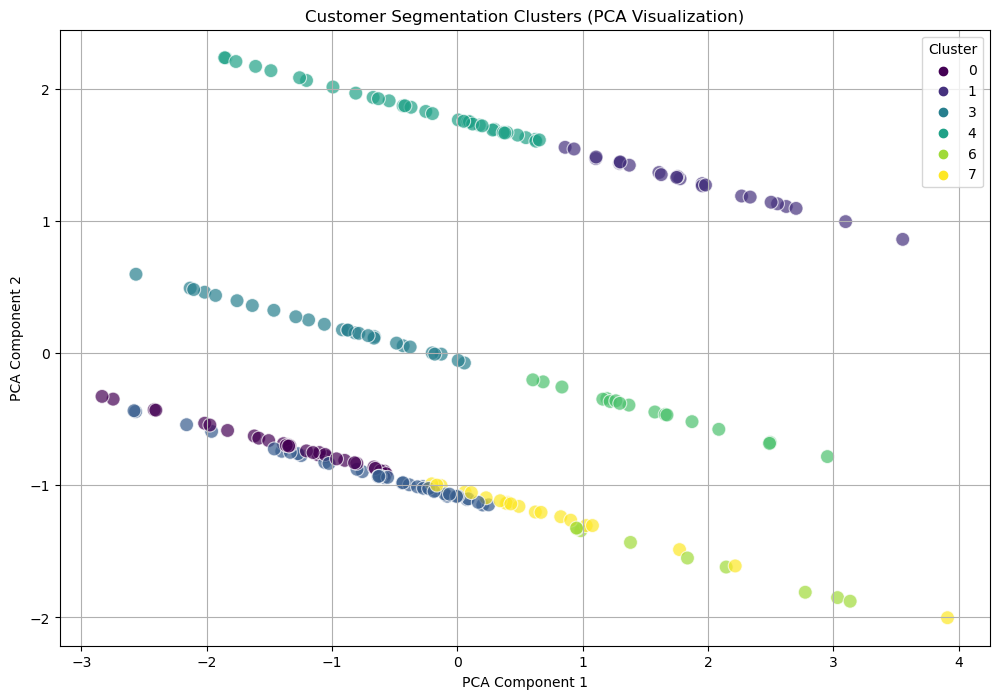

/Users/adarsh/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/adarsh/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


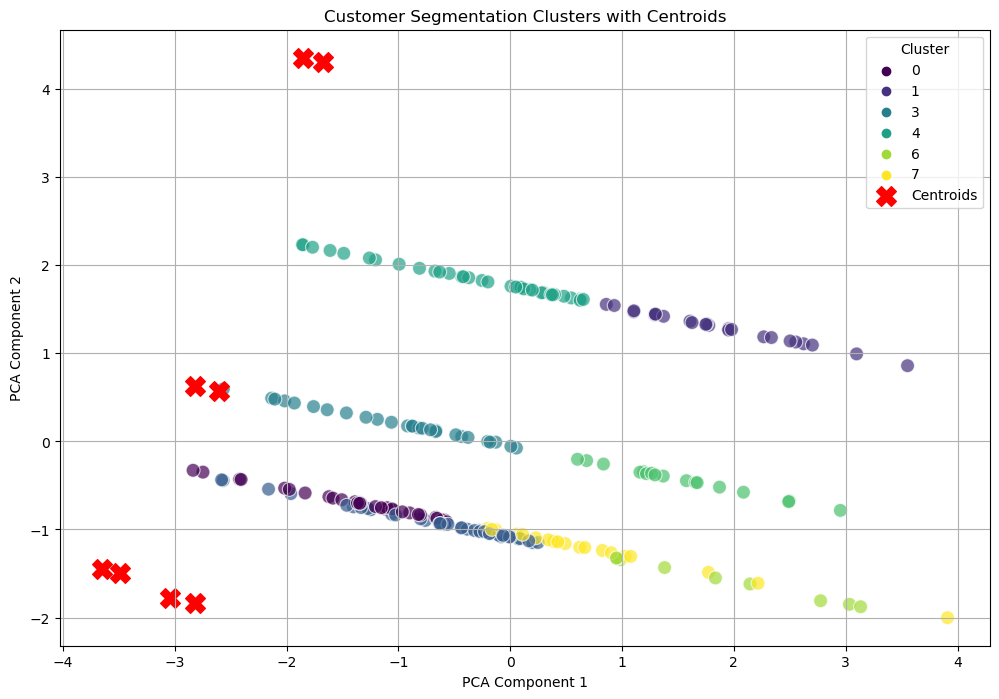

In [5]:
# Final clustering with 8 clusters
optimal_clusters = 8
kmeans = KMeans(n_clusters=optimal_clusters, n_init=10, random_state=42)
customer_profile_data['Cluster'] = kmeans.fit_predict(scaled_features_df)  

# Calculate final DB Index for the chosen number of clusters
final_db_index_value = davies_bouldin_score(scaled_features_df, customer_profile_data['Cluster'])
print(f'Final Davies-Bouldin Index for {optimal_clusters} clusters: {final_db_index_value}')

# Step 1: PCA for Visualization 
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features_df)

# Create a DataFrame for visualization 
visualization_df = pd.DataFrame(reduced_features, columns=['PCA1', 'PCA2'])
visualization_df['Cluster'] = customer_profile_data['Cluster']

# Step 2: Plotting Clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=visualization_df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('Customer Segmentation Clusters (PCA Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid()
plt.show()

# Step 3: Plotting Cluster Centers in PCA Space 
centers = kmeans.cluster_centers_
reduced_centers = pca.transform(scaler.transform(centers))  

plt.figure(figsize=(12, 8))
sns.scatterplot(data=visualization_df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.scatter(reduced_centers[:, 0], reduced_centers[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('Customer Segmentation Clusters with Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid()
plt.show()

## Evaluation Criteria

## 1. Clustering Logic and Metrics

### Clustering Logic:
* **Data Preparation:** The clustering process began with the merging of customer and transaction data to create comprehensive customer profiles. This included aggregating total spending and quantity purchased, as well as encoding categorical variables (e.g., regions) into numerical format.
* **Feature Standardization:** To ensure that all features contributed equally to the clustering process, the data was standardized using StandardScaler. This step is crucial for K-Means clustering, which is sensitive to the scale of the input features.
* **Clustering Algorithm:** K-Means clustering was chosen as the primary algorithm due to its simplicity and effectiveness in partitioning data into distinct groups. The algorithm iteratively assigns data points to clusters based on their proximity to centroids, recalculating centroids until convergence.
* **Optimal Number of Clusters:** The optimal number of clusters was determined through:
    - **Elbow Method:** Evaluated inertia (sum of squared distances from each point to its assigned cluster center) for cluster counts ranging from 2 to 10.
    - **Silhouette Score:** Measured how similar an object is to its own cluster compared to other clusters. Higher scores indicate better-defined clusters.
    - **Davies-Bouldin Index (DB Index):** Calculated to assess the average similarity ratio of each cluster with its most similar cluster. Lower values indicate better clustering quality.
### Clustering Metrics:
* **Inertia Values:** Recorded for different numbers of clusters, indicating how compact the clusters are.
* **Silhouette Scores:** Ranged from approximately 0.2593 (2 clusters) to a maximum of 0.5324 (8 clusters), suggesting varying levels of cluster separation.
* **Davies-Bouldin Index Values:** Ranged from approximately 1.5966 (2 clusters) to a minimum of 0.6317 (8 clusters), indicating that 8 clusters provided the best separation among groups.